In [49]:
import glob
from tabulate import tabulate
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Propiedades termofísicas del agua de mar

### Entropía

In [50]:
c1 = -4.231E+02
c2 = 1.463E+04
c3 = -9.880E+04
c4 = 3.095E+05
c5 = 2.562E+01
c6 = -1.443E-01
c7 = 5.879E-04
c8 = -6.111E+01
c9 = 8.041E+01
c10 = 3.035E-01
WS = 0,0.02,0.04,0.06,0.08,0.10,0.12
#temperatura = list(range(10, 130, 10))
temperatura = 10,20,30,40,50,60,70,80,90,100,110,120,130

In [62]:
r =  [] 
Sw = []
for ws in WS:
    for T10 in temperatura:
        Sw.append(0.1543 + (15.383*T10) - ((2.996E-02)*T10**2)+((8.193E-05)*(T10**3))-((1.370E-07)*(T10**4)))
        r.append([(sw - ws*(c1+(c2*ws)+(c3*(ws**2))+(c4*(ws**3))+(c5*T10)+(c6*(T10**2))+(c7*(T10**3))+(c8*ws*T10)+(c9*(ws**2)*T10)+(c10*ws*(T10**2)))) for sw in Sw])
r

[[151.06885999999997],
 [151.06885999999997, 296.46381999999994],
 [151.06885999999997, 296.46381999999994, 436.7814399999999],
 [151.06885999999997,
  296.46381999999994,
  436.7814399999999,
  572.4310999999999],
 [151.06885999999997,
  296.46381999999994,
  436.7814399999999,
  572.4310999999999,
  703.7893],
 [151.06885999999997,
  296.46381999999994,
  436.7814399999999,
  572.4310999999999,
  703.7893,
  831.1996599999999],
 [151.06885999999997,
  296.46381999999994,
  436.7814399999999,
  572.4310999999999,
  703.7893,
  831.1996599999999,
  954.9729199999999],
 [151.06885999999997,
  296.46381999999994,
  436.7814399999999,
  572.4310999999999,
  703.7893,
  831.1996599999999,
  954.9729199999999,
  1075.3869399999999],
 [151.06885999999997,
  296.46381999999994,
  436.7814399999999,
  572.4310999999999,
  703.7893,
  831.1996599999999,
  954.9729199999999,
  1075.3869399999999,
  1192.6867],
 [151.06885999999997,
  296.46381999999994,
  436.7814399999999,
  572.4310999999999,


In [22]:
S1 = (np.array(r[0]))/1000 
S2 = (np.array(r[1]))/1000 
S3 = (np.array(r[2]))/1000
S4 = (np.array(r[3]))/1000
S5 = (np.array(r[4]))/1000
S6 = (np.array(r[5]))/1000
S7 = (np.array(r[6]))/1000
S1 = np.transpose(S1)
S2s = np.transpose(S2[1,:])
S3s = np.transpose(S3[1,:])
S4s = np.transpose(S4[1,:])
S5s = np.transpose(S5[1,:])
S6s = np.transpose(S6[1,:])
S7s = np.transpose(S7[1,:])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [77]:
S1 = (np.array(r[12]))
S1

array([ 151.06886,  296.46382,  436.78144,  572.4311 ,  703.7893 ,
        831.19966,  954.97292, 1075.38694, 1192.6867 , 1307.0843 ,
       1418.75896, 1527.85702, 1634.49194])

In [73]:
S2 = (np.array(r[18]))
S2

array([ 132.5166152,  277.9115752,  418.2291952,  553.8788552,
        685.2370552,  812.6474152,  936.4206752, 1056.8346952,
       1174.1344552, 1288.5320552, 1400.2067152, 1509.3047752,
       1615.9396952,  132.5166152,  277.9115752,  418.2291952,
        553.8788552,  685.2370552,  812.6474152])

In [75]:
S2s = np.transpose(S2[1:7])
S2s

array([277.9115752, 418.2291952, 553.8788552, 685.2370552, 812.6474152,
       936.4206752])

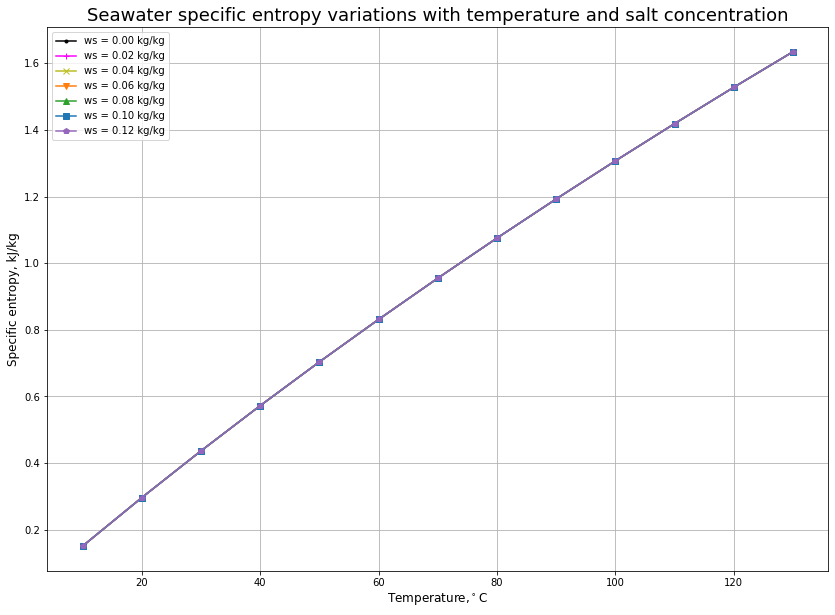

In [26]:
plt.figure(figsize=(14, 10))
plt.plot(temperatura,S1,'.-',color='black', label='ws = 0.00 kg/kg')
plt.plot(temperatura,S2s,'+-',color='magenta', label='ws = 0.02 kg/kg')
plt.plot(temperatura,S3s,'x-',color= '#bcbd22', label='ws = 0.04 kg/kg')
plt.plot(temperatura,S4s,'v-',color='#ff7f0e', label='ws = 0.06 kg/kg')
plt.plot(temperatura,S5s,'^-',color='#2ca02c', label='ws = 0.08 kg/kg')
plt.plot(temperatura,S6s,'s-',color='#1f77b4', label='ws = 0.10 kg/kg')
plt.plot(temperatura,S7s,'p-',color='#9467bd', label='ws = 0.12 kg/kg')
plt.xlabel("Temperature,$^\circ$C",fontsize=12)
plt.ylabel("Specific entropy, kJ/kg",fontsize=12)
plt.grid()
plt.legend()
plt.title('Seawater specific entropy variations with temperature and salt concentration',fontsize=18)
plt.show()

### Entropía considerando variación de presión

In [55]:
a1 = -4.4786E-03
a2 = -1.1654E-02
a3 = 6.1154E-05
a4 = -20.0696E-07
a5 = -1.5531E-03
a6 = 4.0054E-05
a7 = -1.4193E-07
a8 = 3.3142E-10

In [57]:
r2 =  [] 
p3 = []
P = 12
Po = 0.101
for ws in WS:
    p3.append([(a1+(a2*T10)+(a3*T10**2)+(a4*T10**3)+(ws*(a5+(a6*T10)+(a7*T10**2)+(a8*T10**3)))) for T10 in temperatura])
p3

[[-0.11691015999999999,
  -0.22915268,
  -0.35324792,
  -0.50123764,
  -0.6851636,
  -0.91706756,
  -1.2089912799999998,
  -1.57297652,
  -2.02106504,
  -2.5652986,
  -3.2177189600000005,
  -3.9903678800000004,
  -4.895287120000001],
 [-0.11693348843159998,
  -0.2291688028128,
  -0.3532573253732,
  -0.5012407763424,
  -0.68516087595,
  -0.9170593444256,
  -1.2089779019987998,
  -1.5729582688992,
  -2.0210421653563997,
  -2.5652713116,
  -3.2176874278596004,
  -3.9903322343648004,
  -4.895247451345201],
 [-0.11695681686319999,
  -0.2291849256256,
  -0.35326673074639997,
  -0.5012439126848001,
  -0.6851581519,
  -0.9170511288512,
  -1.2089645239975997,
  -1.5729400177984,
  -2.0210192907128,
  -2.5652440232,
  -3.2176558957192003,
  -3.9902965887296005,
  -4.895207782690401],
 [-0.11698014529479998,
  -0.2292010484384,
  -0.3532761361196,
  -0.5012470490272001,
  -0.6851554278499999,
  -0.9170429132768,
  -1.2089511459963997,
  -1.5729217666976,
  -2.0209964160691998,
  -2.56521673480000

In [34]:
Ps1 = (np.array(p3[0]))
Ps2 = (np.array(p3[1]))
Ps3 = (np.array(p3[2]))
Ps4 = (np.array(p3[3]))
Ps5 = (np.array(p3[4]))
Ps6 = (np.array(p3[5]))
Ps7 = (np.array(p3[6]))

In [40]:
Pes = 2,4,6,8,10,12 #MPa
DeltaP = P-Po
Stot = S1,S2s,S3s,S4s,S5s,S6s,S7s
Pstot = Ps1,Ps2,Ps3,Ps4,Ps5,Ps6,Ps7
for P in Stot:
    DeltaPs = [P-Po for P in Pes]
    for DeltaP in DeltaPs:
        SP = [P*1000 + DeltaP*Ps for Ps in Ptot]
        SP.append(SP)

NameError: name 'Ptot' is not defined

In [37]:
SPs1 = (np.array(SP[0]))/1000 
SPs2 = (np.array(SP[1]))/1000 
SPs3 = (np.array(SP[2]))/1000 
SPs4 = (np.array(SP[3]))/1000 
SPs5 = (np.array(SP[4]))/1000 
SPs6 = (np.array(SP[5]))/1000 
SPs7 = (np.array(SP[6]))/1000 

In [38]:
Ent = np.transpose(S1)
d1 = ((Ent-SPs1)/SPs1)
d2 = ((S2s-SPs2)/SPs2)
d3 = ((S3s-SPs3)/SPs3)
d4 = ((S4s-SPs4)/SPs4)
d5 = ((S5s-SPs5)/SPs5)
d6 = ((S6s-SPs6)/SPs6)
d7 = ((S7s-SPs7)/SPs7)

ValueError: x and y must have same first dimension, but have shapes (13,) and (1,)

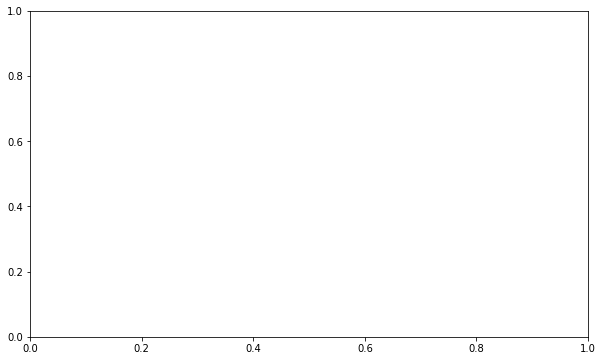

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(temperatura,d1[0],'v',color='black', label='ws = 0.00 kg/kg')
plt.plot(temperatura,d2,'v',color='magenta', label='ws = 0.02 kg/kg')
plt.plot(temperatura,d3,'v',color= '#bcbd22', label='ws = 0.04 kg/kg')
plt.plot(temperatura,d4,'v',color='#ff7f0e', label='ws = 0.06 kg/kg')
plt.plot(temperatura,d5,'v',color='#2ca02c', label='ws = 0.08 kg/kg')
plt.plot(temperatura,d6,'v',color='#1f77b4', label='ws = 0.10 kg/kg')
plt.plot(temperatura,d7,'v',color='#9467bd', label='ws = 0.12 kg/kg')
plt.xlabel("Temperature,$^\circ$C",fontsize=12)
plt.ylabel("$S_{sw,a1}-S_{sw}/S_{sw}$",fontsize=12)
plt.grid()
plt.legend()
plt.title('Deviation of seawater entropy data',fontsize=18)
plt.show()

### Entalpía

In [41]:
b1 = -2.348E+04
b2 = 3.152E+05
b3 = 2.803E+06
b4 = -1.446E+07
b5 = 7.826E+03
b6 = -4.417E+01
b7 = 2.139E-01
b8 = -1.991E+04
b9 = 2.778E+04
b10 = 9.728E+01

In [42]:
rh =  [] 
Hw = []
for ws in WS:
    Hw.append([(141.355+(4202.070*T10)-(0.535*(T10**2))+(0.04*(T10**3))) for T10 in temperatura])
    rh.append([hw - ws*(b1+(b2*ws)+(b3*(ws**2))+(b4*(ws**3))+(b5*T10)+(b6*(T10**2))+(b7*(T10**3))+(b8*ws*T10)+(b9*(ws**2)*T10)+(b10*ws*(T10**2))) for hw in Hw ])

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [ ]:
H1 = (np.array(rh[0]))/1000 
H2 = (np.array(rh[1]))/1000 
H3 = (np.array(rh[2]))/1000
H4 = (np.array(rh[3]))/1000
H5 = (np.array(rh[4]))/1000
H6 = (np.array(rh[5]))/1000
H7 = (np.array(rh[6]))/1000

In [ ]:
H1 = np.transpose(H1)
H2s = np.transpose(H2[1,:])
H3s = np.transpose(H3[1,:])
H4s = np.transpose(H4[1,:])
H5s = np.transpose(H5[1,:])
H6s = np.transpose(H6[1,:])
H7s = np.transpose(H7[1,:])

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(temperatura,H1,'.-',color='black', label='ws = 0.00 kg/kg')
plt.plot(temperatura,H2s,'+-',color='magenta', label='ws = 0.02 kg/kg')
plt.plot(temperatura,H3s,'x-',color= '#bcbd22', label='ws = 0.04 kg/kg')
plt.plot(temperatura,H4s,'v-',color='#ff7f0e', label='ws = 0.06 kg/kg')
plt.plot(temperatura,H5s,'^-',color='#2ca02c', label='ws = 0.08 kg/kg')
plt.plot(temperatura,H6s,'s-',color='#1f77b4', label='ws = 0.10 kg/kg')
plt.plot(temperatura,H7s,'p-',color='#9467bd', label='ws = 0.12 kg/kg')
plt.xlabel("Temperature,$^\circ$C",fontsize=12)
plt.ylabel("Specific entalpy, kJ/kg",fontsize=12)
plt.xlim()
plt.grid()
plt.legend()
plt.title('Seawater specific entalpy variations with temperature and salt concentration',fontsize=18)
plt.show()

### Entalpía considerando variaciones de presión

In [ ]:
e1 = 996.7767
e2 = -3.2406
e3 = 0.0127
e4 = -4.7723E-05
e5 = -1.1748
e6 = 0.01169
e7 = -2.6185E-05
e8 = 7.0661E-08

In [ ]:
p4 = []
for ws in WS:
    p4.append([(e1+(e2*T10)+(e3*T10**2)+(e4*T10**3)+(ws*(e5+(e6*T10)+(e7*T10**2)+(e8*T10**3)))) for T10 in temperatura])

In [ ]:
Pe1 = (np.array(p4[0]))
Pe2 = (np.array(p4[1]))
Pe3 = (np.array(p4[2]))
Pe4 = (np.array(p4[3]))
Pe5 = (np.array(p4[4]))
Pe6 = (np.array(p4[5]))
Pe7 = (np.array(p4[6]))

In [ ]:
Pes = 2,4,6,8,10,12 #MPa
DeltaP = P-Po
Htot = H1,H2s,H3s,H4s,H5s,H6s,H7s
Petot = Pe1,Pe2,Pe3,Pe4,Pe5,Pe6,Pe7
for P in Htot:
    DeltaPs = [P-Po for P in Pes]
    for DeltaP in DeltaPs:
        SPe = [P*1000 + DeltaP*Pe for Pe in Petot]
        SPe.append(SPe)
Spe

In [ ]:
SPe1 = (np.array(SPe[0]))/1000 
SPe2 = (np.array(SPe[1]))/1000 
SPe3 = (np.array(SPe[2]))/1000 
SPe4 = (np.array(SPe[3]))/1000 
SPe5 = (np.array(SPe[4]))/1000 
SPe6 = (np.array(SPe[5]))/1000 
SPe7 = (np.array(SPe[6]))/1000 

In [ ]:
Enta = np.transpose(H1)
de1 = ((Enta-SPe1)/SPe1)
de2 = ((H2s-SPe2)/SPe2)
de3 = ((H3s-SPe3)/SPe3)
de4 = ((H4s-SPe4)/SPe4)
de5 = ((H5s-SPe5)/SPe5)
de6 = ((H6s-SPe6)/SPe6)
de7 = ((H7s-SPe7)/SPe7)

In [43]:
plt.figure(figsize=(10, 7))
plt.plot(temperatura,de1[0],'v',color='black', label='ws = 0.00 kg/kg')
plt.plot(temperatura,de2,'v',color='magenta', label='ws = 0.02 kg/kg')
plt.plot(temperatura,de3,'v',color= '#bcbd22', label='ws = 0.04 kg/kg')
plt.plot(temperatura,de4,'v',color='#ff7f0e', label='ws = 0.06 kg/kg')
plt.plot(temperatura,de5,'v',color='#2ca02c', label='ws = 0.08 kg/kg')
plt.plot(temperatura,de6,'v',color='#1f77b4', label='ws = 0.10 kg/kg')
plt.plot(temperatura,de7,'v',color='#9467bd', label='ws = 0.12 kg/kg')
plt.xlabel("Temperature,$^\circ$C",fontsize=12)
plt.ylabel("$S_{sw,a1}-S_{sw}/S_{sw}$",fontsize=12)
plt.grid()
plt.legend()
plt.title('Deviation of seawater entropy data',fontsize=18)
plt.show()

NameError: name 'de1' is not defined

<Figure size 720x504 with 0 Axes>

### Volumen específico

In [44]:
d1 = 8.020E+02
d2 = -2.001
d3 = 1.677E-02
d4 = -3.060E-05
d5 = -1.613E-05

In [45]:
rv =  [] 
Pw = []
for ws in WS:
    Pw.append([(9.999E+02+(2.034E-02*T10)-(6.162E-03*(T10**2))+(2.261E-05*(T10**3))-(4.657E-08*(T10**4))) for T10 in temperatura])
    rv.append([(pw + ws*(d1+(d2*T10)+(d3*(T10**2))+(d4*(T10**3))+(d5*ws*(T10**2)))) for pw in Pw ])

TypeError: can only concatenate list (not "float") to list

In [46]:
rv1 = (np.array(rv[0]))*1000
rv2 =(np.array(rv[1]))*1000
rv3 =(np.array(rv[2]))*1000
rv4 =(np.array(rv[3]))*1000
rv5 =(np.array(rv[4]))*1000
rv6 =(np.array(rv[5]))*1000
rv7 =(np.array(rv[6]))*1000

IndexError: list index out of range

In [47]:
w1 = 1/(np.array(rv[0]))*1000
w2 = 1/(np.array(rv[1]))*1000
w3 = 1/(np.array(rv[2]))*1000
w4 = 1/(np.array(rv[3]))*1000
w5 = 1/(np.array(rv[4]))*1000
w6 = 1/(np.array(rv[5]))*1000
w7 = 1/(np.array(rv[6]))*1000

IndexError: list index out of range

In [48]:
v1 = np.transpose(w1)
v2 = np.transpose(w2[1,:])
v3 = np.transpose(w3[1,:])
v4 = np.transpose(w4[1,:])
v5 = np.transpose(w5[1,:])
v6 = np.transpose(w6[1,:])
v7 = np.transpose(w7[1,:])

NameError: name 'w1' is not defined

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(temperatura,v1,'.-',color='black', label='ws = 0.00 kg/kg')
plt.plot(temperatura,v2,'+-',color='magenta', label='ws = 0.02 kg/kg')
plt.plot(temperatura,v3,'x-',color= '#bcbd22', label='ws = 0.04 kg/kg')
plt.plot(temperatura,v4,'v-',color='#ff7f0e', label='ws = 0.06 kg/kg')
plt.plot(temperatura,v5,'^-',color='#2ca02c', label='ws = 0.08 kg/kg')
plt.plot(temperatura,v6,'s-',color='#1f77b4', label='ws = 0.10 kg/kg')
plt.plot(temperatura,v7,'p-',color='#9467bd', label='ws = 0.12 kg/kg')
plt.xlabel("Temperature,$^\circ$C",fontsize=12)
plt.ylabel("Specific volume $x10^{3}$, $m^{3}/kg$ ",fontsize=12)
plt.xlim()
plt.grid()
plt.legend()
plt.title('Seawater specific volume variations with temperature and salt concentration',fontsize=18)
plt.show()

### Volumen específico considerando variaciones de presión

In [ ]:
f1 = 5.0792E-04
f2 = -3.4168E-06
f3 = 5.6931E-08
f4 = -3.7262E-10
f5 = 1.4465E-12
f6 = -1.7058E-15
f7 = -1.3389E-06
f8 = 4.8603E-09
f9 = -6.8039E-13
g1 = -1.1077E-06
g2 = 5.5584E-09
g3 = -4.2539E-11
g4 = 8.3702E-09

In [ ]:
p5 = []
p6 = []
for ws in WS:
    p5.append([(f1+(f2*T10)+(f3*T10**2)+(f4*T10**3)+(f5*T10**4)+(f6*T10**5)+(ws*(g1+(g2*T10)+(g3*T10**2)))) for T10 in temperatura])
    p6.append([(f7+(f8*T10)+(f9*T10**3)+(g4*ws)) for T10 in temperatura])

In [ ]:
Pd1 = (np.array(p5[0]))
Pd2 = (np.array(p5[1]))
Pd3 = (np.array(p5[2]))
Pd4 = (np.array(p5[3]))
Pd5 = (np.array(p5[4]))
Pd6 = (np.array(p5[5]))
Pd7 = (np.array(p5[6]))

In [ ]:
Pd11 = (np.array(p6[0]))
Pd12 = (np.array(p6[1]))
Pd13 = (np.array(p6[2]))
Pd14 = (np.array(p6[3]))
Pd15 = (np.array(p6[4]))
Pd16 = (np.array(p6[5]))
Pd17 = (np.array(p6[6]))

In [ ]:
Pes = 2,4,6,8,10,12 #MPa
Dtot = rv1,rv2,rv3,rv4,rv5,rv6,rv7
Pdtot = Pd1,Pd2,Pd3,Pd4,Pd5,Pd6,Pd7
Pd1tot = Pd11,Pd12,Pd13,Pd14,Pd15,Pd16,Pd17
for P in Pes:
    DeltaPs = [P-Po]
    DeltaPs2 = [P**2 - Po**2]
    for DeltaPn in DeltaPs:
        Den1 = [DeltaPn*Pdtotn for Pdtotn in Pdtot] 
        for DeltaPm in DeltaPs2:
            Den2 = [((DeltaPm/2)*Den3) for Den3 in Pd1tot]        

In [ ]:
#for Pden in Dtot:
    #SPd = [(Pden*1000) * (np.exp(Den1+Den2))]
#SPd.append(SPd) 